<a href="https://www.kaggle.com/code/patrickleal/brazilian-stadiums-analysis-viz?scriptVersionId=146041427" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Importing libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')

In [2]:
stadiums = pd.read_csv('/kaggle/input/brazilian-stadiums-dataset/brazilian-stadiums-v2_0.csv')
stadium_details = pd.read_csv('/kaggle/input/brazilian-stadiums-dataset/brazilian-stadium-details-v2_0.csv') 

# **Data Analysis**

## **Perguntas:**

1. Há quantos proprietários distintos?
1. tem quantos estádios por proprietário?
1. quantas UFs distintas tem estádios?
1. tem quantas cidades com estádios por Ufs?
1. qual é a capacidade média dos estádios por cidade?
1. Qual é o estádio com maior capacidade por UFs?
1. Top 10 estádios por capacidade?
1. Bottom 10 estádios por capacidade?
1. Top 10 cidades por quantidade de estadios
1. Bottom 10 cidades por quantidade de estadios
1. Top 10 Record Attendance



**Há quantos proprietários distintos?**

In [3]:
print('Count of Owners: ', stadiums['Owner'].nunique())

Count of Owners:  5


**tem quantos estádios por proprietário?**

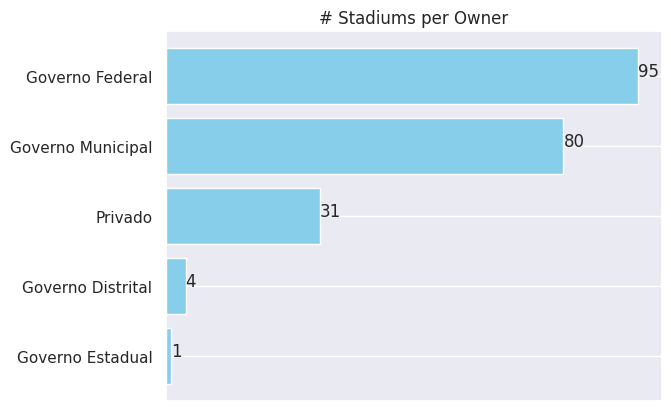

In [4]:
stadium_per_owner = pd.DataFrame(stadiums['Owner'].value_counts())
stadium_per_owner = stadium_per_owner.sort_values(by='count', ascending=True)
labels = stadiums['Owner'].unique()

plt.barh(labels, stadium_per_owner['count'], color='skyblue')
plt.title('# Stadiums per Owner')

# Remove the xticks
plt.xticks([])

for index, value in enumerate(stadium_per_owner['count']):
    plt.text(value, index, str(value), ha='left')

plt.show()

**quantas UFs distintas tem estádios?**

In [5]:
print('Count of Federative Units: ', stadiums['Federative_Units'].nunique())

Count of Federative Units:  27


All the Federative Units of Brazil have stadiums because Brazil has 27 FUs in total.

**tem quantas cidades com estádios por Ufs?**

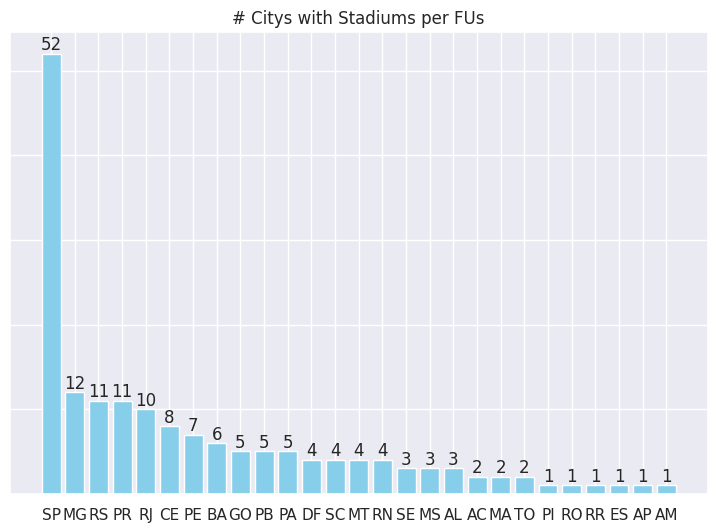

In [6]:
uniq_city_per_FUs = pd.DataFrame(stadiums.groupby('Federative_Units')['Locality'].nunique())
uniq_city_per_FUs = uniq_city_per_FUs.sort_values(by='Locality', ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(9, 6))

bar_container = ax.bar(uniq_city_per_FUs['Federative_Units'], uniq_city_per_FUs['Locality'],
                      color='skyblue')
ax.bar_label(bar_container)

# Esconder os rótulos (labels) do eixo y, mantendo os tiques (tics)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.title("# Citys with Stadiums per FUs")

plt.show()

alterar visual depois

**5) qual é a capacidade média dos estádios por cidade?**

In [7]:
avg_capacity_per_city = stadiums.groupby('Locality')['Capacity'].describe().reset_index()
avg_capacity_per_city = avg_capacity_per_city[['Locality', 'count', 'mean']]

# analysing only the citys that have 2 or more stadiums
avg_capacity_per_city = avg_capacity_per_city[avg_capacity_per_city['count'] >= 2]

avg_capacity_per_city_top10 = avg_capacity_per_city[['Locality', 'mean']].sort_values(by='mean', ascending=False).head(10)
avg_capacity_per_city_bottom10 = avg_capacity_per_city[['Locality', 'mean']].sort_values(by='mean', ascending=False).tail(10)

In [8]:
colormap = ['YlGn', 'YlGn_r', 'OrRd', 'OrRd_r', 'summer', 'summer_r', 'autumn', 'autumn_r']

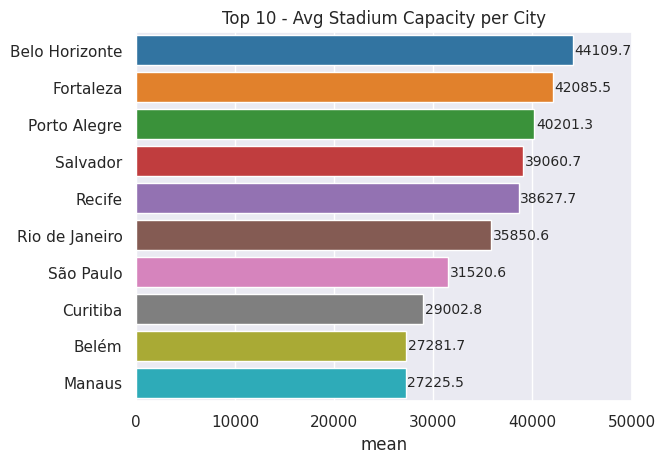

In [9]:
fig, ax = plt.subplots()

sns.barplot(x='mean', y='Locality', data=avg_capacity_per_city_top10, palette='tab10')
plt.title('Top 10 - Avg Stadium Capacity per City')

ax.set(xlim=(0, 50000), ylabel="")

ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

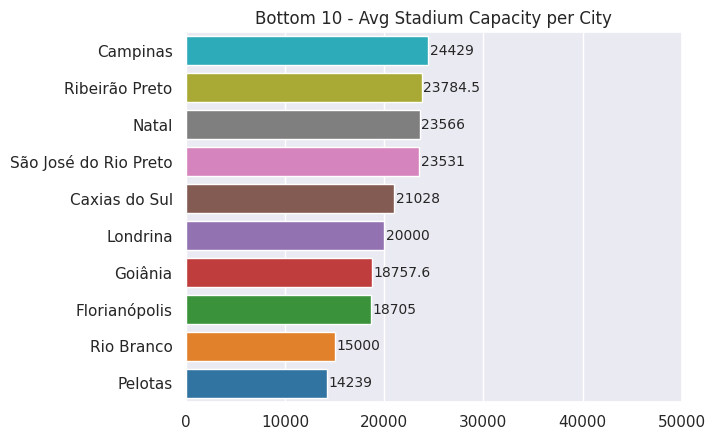

In [10]:
# Initialize the matplotlib figure
fig, ax = plt.subplots()

sns.barplot(x='mean', y='Locality', data=avg_capacity_per_city_bottom10, palette='tab10_r')
plt.title('Bottom 10 - Avg Stadium Capacity per City')

ax.set(xlim=(0, 50000), ylabel="",
      xlabel="")
ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

**6) Qual é o estádio com maior capacidade por UFs?**

In [11]:
max_capacity_per_FUs = stadiums.loc[stadiums.groupby('Federative_Units')['Capacity'].idxmax()].reset_index()
max_capacity_per_FUs = max_capacity_per_FUs[['Federative_Units', 'Stadium_Name', 'Capacity']]
max_capacity_per_FUs = max_capacity_per_FUs.sort_values(by='Capacity')

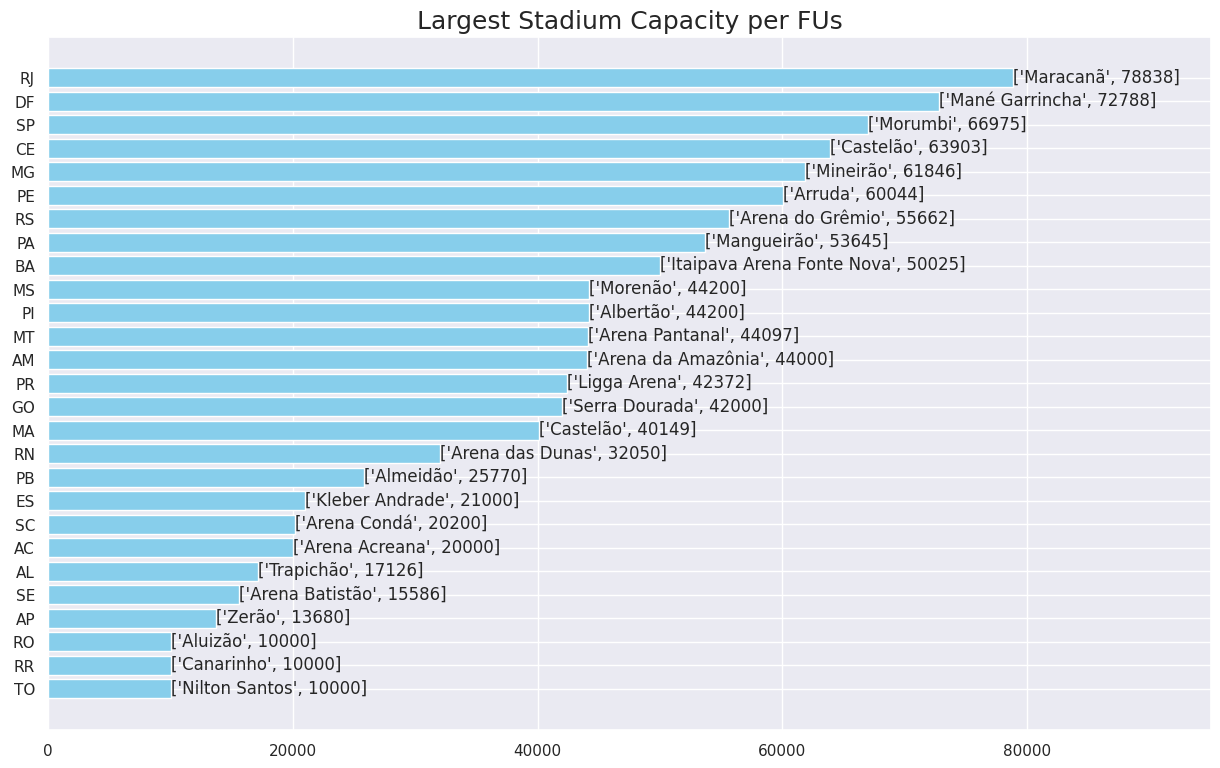

In [12]:
# creating the plot
fig, ax = plt.subplots(figsize=(15, 9))
bars = ax.barh(max_capacity_per_FUs['Federative_Units'], max_capacity_per_FUs['Capacity'], 
               color='skyblue')

# displaying the capacity and the stadium names on the bars
bar_labels = list(max_capacity_per_FUs['Stadium_Name'])
for bar, capacity, label in zip(bars, max_capacity_per_FUs['Capacity'], bar_labels):
    ax.text(capacity, bar.get_y() + bar.get_height() / 3.5 , str([label, capacity]), ha='left')

plt.title("Largest Stadium Capacity per FUs", fontsize=18)

# ax.invert_yaxis()

ax.set_xlim(right=95000)

plt.show()

alterar visual depois

**Top 10 estádios por capacidade?**

In [13]:
stadiums[['Stadium_Name', 'Capacity']].sort_values(by='Capacity', ascending=False).head(10)\
                                      .style.background_gradient(cmap=colormap[5])

,Stadium_Name,Capacity
0,Maracanã,78838
1,Mané Garrincha,72788
2,Morumbi,66975
3,Castelão,63903
4,Mineirão,61846
5,Arruda,60044
6,Arena do Grêmio,55662
7,Mangueirão,53645
8,Parque do Sabiá,53350
9,Beira-Rio,50942


**Bottom 10 estádios por capacidade?**

In [14]:
stadiums[['Stadium_Name', 'Capacity']].sort_values(by='Capacity', ascending=False).tail(10)\
                                      .style.background_gradient(cmap=colormap[5])

,Stadium_Name,Capacity
193,Nogueirão,10000
192,VGD,10000
191,Vila Olímpica,10000
190,Complexo Esportivo da ULBRA,10000
189,Cristo Rei,10000
188,Estrela D'Alva,10000
187,Florestão,10000
186,Teotônio Vilela,10000
184,Arena do Calçado,10000
210,Arena do Juruá,10000


**Top 10 cidades por quantidade de estadios**

In [15]:
count_stadiums_per_city = pd.DataFrame(stadiums.groupby('Locality')['Stadium_Name'].count())
count_stadiums_per_city = count_stadiums_per_city.sort_values(by='Stadium_Name', ascending=False).reset_index()
count_stadiums_per_city_top10 = count_stadiums_per_city[:10]
count_stadiums_per_city_bottom10 = count_stadiums_per_city[-10:]

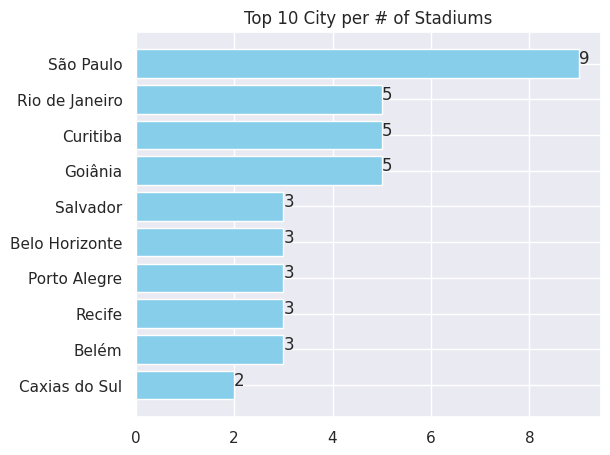

In [16]:
plt.subplots(figsize=(6, 5))
count_stadiums_per_city_top10 = count_stadiums_per_city_top10.sort_values(by='Stadium_Name',
                                                                          ascending=True)
labels = count_stadiums_per_city_top10['Locality']

plt.barh(labels, count_stadiums_per_city_top10['Stadium_Name'],
         color='skyblue')

plt.title('Top 10 City per # of Stadiums')

for index, value in enumerate(count_stadiums_per_city_top10['Stadium_Name']):
    plt.text(value, index, str(value), ha='left')

plt.show()

**Bottom 10 cidades por quantidade de estadios**

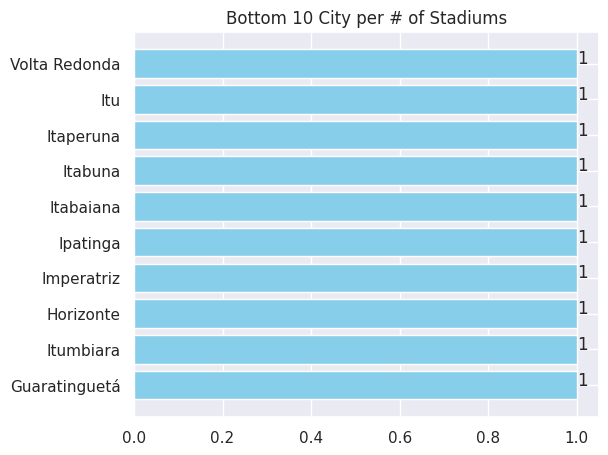

In [17]:
plt.subplots(figsize=(6, 5))
count_stadiums_per_city_bottom10 = count_stadiums_per_city_bottom10.sort_values(by='Stadium_Name',
                                                                          ascending=False)
labels = count_stadiums_per_city_bottom10['Locality']

plt.barh(labels, count_stadiums_per_city_bottom10['Stadium_Name'],
         color='skyblue')

plt.title('Bottom 10 City per # of Stadiums')

for index, value in enumerate(count_stadiums_per_city_bottom10['Stadium_Name']):
    plt.text(value, index, str(value), ha='left')

plt.show()

alterar visuais depois

**11) Top 10 Record Attendance**

In [18]:
stadium_details.head()

,stadium_name,official_name,nicknames,opening_date,record_attendance,record_date,Match_with_the_highest_attendance
0,Maracanã,Estádio Jornalista Mário Filho,O Maior do Mundo Templo do Futebol Maraca,1950-06-16,199854,1950-07-16,Brasil 1–2 Uruguai
1,Arena BRB Mané Garrincha,Arena BRB Mané Garrincha,Mané Garrincha O Gigante,1974-10-03,69389,2016-04-08,Brasil 0x0 África do Sul
2,Morumbi Estádio Cícero Pompeu de Toledo,Estádio Cícero Pompeu de Toledo,Morumbi,1960-02-10,146082,1977-09-10,Corinthians 1 × 2 Ponte Preta
3,Arena Castelão Estádio Governador Plácido Castelo,Estádio Governador Plácido Castelo,"Castelão, Gigante da Boa Vista, Arena Castelão",1973-11-11,118496,1980-08-27,Brasil 1-0 Uruguai
4,Mineirão Estádio Governador Magalhães Pinto,Estádio Governador Magalhães Pinto,Mineirão Gigante da Pampulha,1965-05-09,132834,1997-06-22,Cruzeiro EC 1x0 Villa Nova


In [19]:
stadium_details['Match_with_the_highest_attendance'] = stadium_details['Match_with_the_highest_attendance']\
                                                            .str.replace('X', ' x ').str.replace('–', ' x ')

In [20]:
stadium_details[['official_name', 'record_date', 'Match_with_the_highest_attendance', 'record_attendance']]\
                .sort_values(by='record_attendance', ascending=False).head(10)\
                .style.background_gradient(cmap=colormap[5])

,official_name,record_date,Match_with_the_highest_attendance,record_attendance
0,Estádio Jornalista Mário Filho,1950-07-16,Brasil 1 x 2 Uruguai,199854
2,Estádio Cícero Pompeu de Toledo,1977-09-10,Corinthians 1 × 2 Ponte Preta,146082
4,Estádio Governador Magalhães Pinto,1997-06-22,Cruzeiro EC 1x0 Villa Nova,132834
3,Estádio Governador Plácido Castelo,1980-08-27,Brasil 1-0 Uruguai,118496
8,Estádio José Pinheiro Borda,1972-06-17,Rio Grande do Sul 3 x 3 Brasil,106554
15,Estádio Governador João Castelo,1998-09-24,Sampaio Corrêa 1x5 Santos,98720
5,Estádio Jose do rego Maciel,1993-08-29,Brasil 6 - 0 Bolívia,96990
13,Estádio do Governo do Estado de Goiás,1978-03-19,Seleção Goiana 1x3 Seleção Brasileira,77790
27,Estádio Municipal Paulo Machado de Carvalho,1977-11-12,Palmeiras 1 x 1 Santos,73532
7,Estádio Municipal Parque do Sabiá,1982-05-27,Brasil 7x0 Irlanda,72733


**Estádio mais antigo?**

In [21]:
stadium_details['opening_date'] = pd.to_datetime(stadium_details['opening_date'])
stadium_details['record_date'] = pd.to_datetime(stadium_details['record_date'])

In [22]:
from datetime import datetime

In [23]:
current_date = datetime.now()

In [24]:
days_in_year = 365.2425
age_df = stadium_details[['stadium_name', 'official_name', 'opening_date']]
age_df['stadium_age'] = (current_date - age_df['opening_date']).dt.days // days_in_year
age_df['stadium_age'] = age_df['stadium_age'].astype(int)
top10_oldest = age_df.sort_values(by='stadium_age', ascending=False).head(10)

In [25]:
top10_oldest

,stadium_name,official_name,opening_date,stadium_age
76,Estádio Boca do Lobo,Estádio Boca do Lobo,1908-10-25,114
71,Estádio Curuzu Estádio Leônidas Sodré de Castro,Estádio Leônidas Sodré de Castro,1914-06-14,109
12,Ligga Arena Estádio Joaquim Américo Guimarães,Estádio Joaquim Américo Guimarães,1914-06-09,109
39,Vila Belmiro Estádio Urbano Caldeira,Estádio Urbano Caldeira,1916-12-10,106
103,Estádio Banpará Baenão Estádio Evandro Almeida,Estádio Banpará Baenão,1917-08-15,106
81,Campos Maia Estádio José Maria de Campos Maia,Estádio Municipal José Maria de Campos Maia,1925-09-11,98
31,Estádio São Januário Estádio Vasco da Gama,Estádio Vasco da Gama,1927-04-21,96
55,Parque São Jorge Estádio Alfredo Schürig,Estádio Alfredo Schürig,1928-07-22,95
14,Estádio Couto Pereira Estádio Major Antônio C...,Estádio Major Antônio Couto Pereira,1932-11-20,90
53,Alfredo de Castilho (Alfredão) Estádio Alfredo...,Estádio Alfredo de Castilho,1935-01-08,88


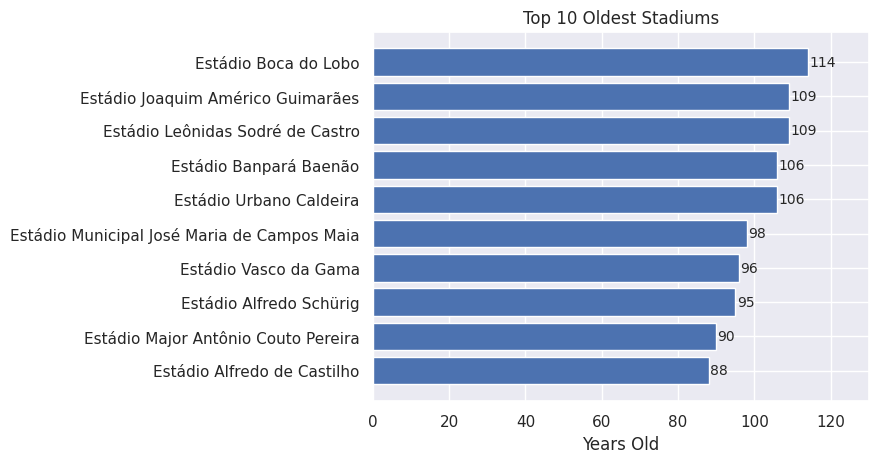

In [26]:
# Initialize the matplotlib figure
fig, ax = plt.subplots()

top10_oldest = top10_oldest.sort_values(by='stadium_age')
plt.barh(top10_oldest.official_name, top10_oldest.stadium_age);
plt.title('Top 10 Oldest Stadiums')

ax.set(xlim=(0, 130), ylabel="",
      xlabel="Years Old")

ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

**Inuagurações por decadas**

In [27]:
age_df['decade'] = 10 * (age_df['opening_date'].dt.year // 10)
age_df

,stadium_name,official_name,opening_date,stadium_age,decade
0,Maracanã,Estádio Jornalista Mário Filho,1950-06-16,73,1950
1,Arena BRB Mané Garrincha,Arena BRB Mané Garrincha,1974-10-03,49,1970
2,Morumbi Estádio Cícero Pompeu de Toledo,Estádio Cícero Pompeu de Toledo,1960-02-10,63,1960
3,Arena Castelão Estádio Governador Plácido Castelo,Estádio Governador Plácido Castelo,1973-11-11,49,1970
4,Mineirão Estádio Governador Magalhães Pinto,Estádio Governador Magalhães Pinto,1965-05-09,58,1960
...,...,...,...,...,...
120,Distrital do Inamar Estádio José Batista Perei...,Estádio Municipal José Batista Pereira Fernandes,2009-05-22,14,2000
121,ArizãoAry de Oliveira e Souza,Estádio Ary de Oliveira e Souza,1938-09-01,85,1930
122,Frei Epifânio,Estádio Municipal Frei Epifânio D'Abadia,1966-01-30,57,1960
123,Nilton Santos Estádio Nilton Santos,Estádio Nilton Santos,2000-12-10,22,2000


In [28]:
opening_per_decades = age_df.pivot_table('official_name', index='decade', aggfunc='count').reset_index()
opening_per_decades

,decade,official_name
0,1900,1
1,1910,4
2,1920,3
3,1930,7
4,1940,11
5,1950,15
6,1960,21
7,1970,24
8,1980,19
9,1990,6


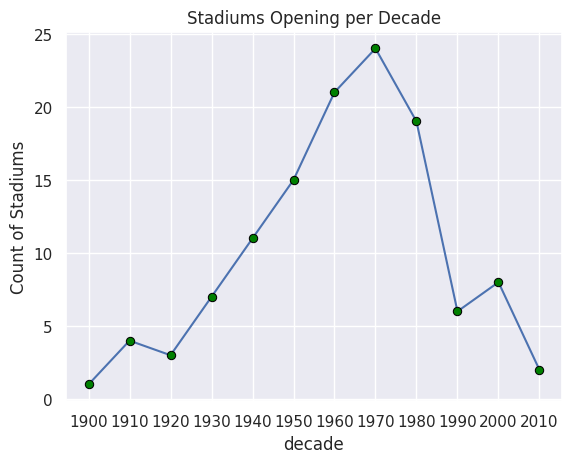

In [29]:
sns.lineplot(data=opening_per_decades, x='decade', y='official_name', 
            marker='o', markerfacecolor='green', markeredgecolor='black')
plt.title("Stadiums Opening per Decade")
plt.xticks(opening_per_decades.decade)
plt.ylabel('Count of Stadiums',size=12)
plt.show()

alterar visuais depois

ver.1.3